## Import

In [1]:
from common_imports import *

c:\Users\user\anaconda3\envs\2024_stock_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Stock Index Futures Data Preprocessing

In [2]:
# 디렉토리 설정
directory = './data/Futures_KOSPI/'

# 모든 데이터를 저장할 빈 DataFrame 생성
stock_data = pd.DataFrame()

# 디렉토리 내의 모든 파일을 순회
for filename in tqdm(sorted(os.listdir(directory))):
    if filename.endswith('.xlsx'):
        # 각 파일의 경로 생성
        file_path = os.path.join(directory, filename)
        
        # 파일 내의 모든 시트를 읽어서 하나의 DataFrame으로 결합
        df = pd.concat(pd.read_excel(file_path, sheet_name=None), ignore_index=True)
        
        # 결합된 데이터를 stock_data에 추가
        stock_data = pd.concat([stock_data, df], ignore_index=True)

# 결과 DataFrame 확인
print(stock_data.head())

100%|██████████| 35/35 [00:14<00:00,  2.36it/s]

                 time    open    high     low   close  volume
0 2022-02-10 09:00:00  370.70  371.90  370.70  371.55    7202
1 2022-02-10 09:01:00  371.55  371.85  371.35  371.80    3007
2 2022-02-10 09:02:00  371.80  372.10  371.45  371.65    3332
3 2022-02-10 09:03:00  371.65  371.80  371.50  371.65    1575
4 2022-02-10 09:04:00  371.65  371.70  371.30  371.45    1585


In [3]:
# 'time' 열을 datetime 형태로 변환
stock_data['time'] = pd.to_datetime(stock_data['time'])

# 날짜별로 행의 수 계산
daily_counts = stock_data.groupby(stock_data['time'].dt.date).size()

print(daily_counts)

time
2022-02-10    396
2022-02-11    396
2022-02-14    396
2022-02-15    396
2022-02-16    396
             ... 
2024-12-23    411
2024-12-24    411
2024-12-26    411
2024-12-27    411
2024-12-30    411
Length: 708, dtype: int64


In [4]:
unique_values = daily_counts.unique()
print("Unique values:", unique_values)

Unique values: [396 380 336 411 395 351 382]


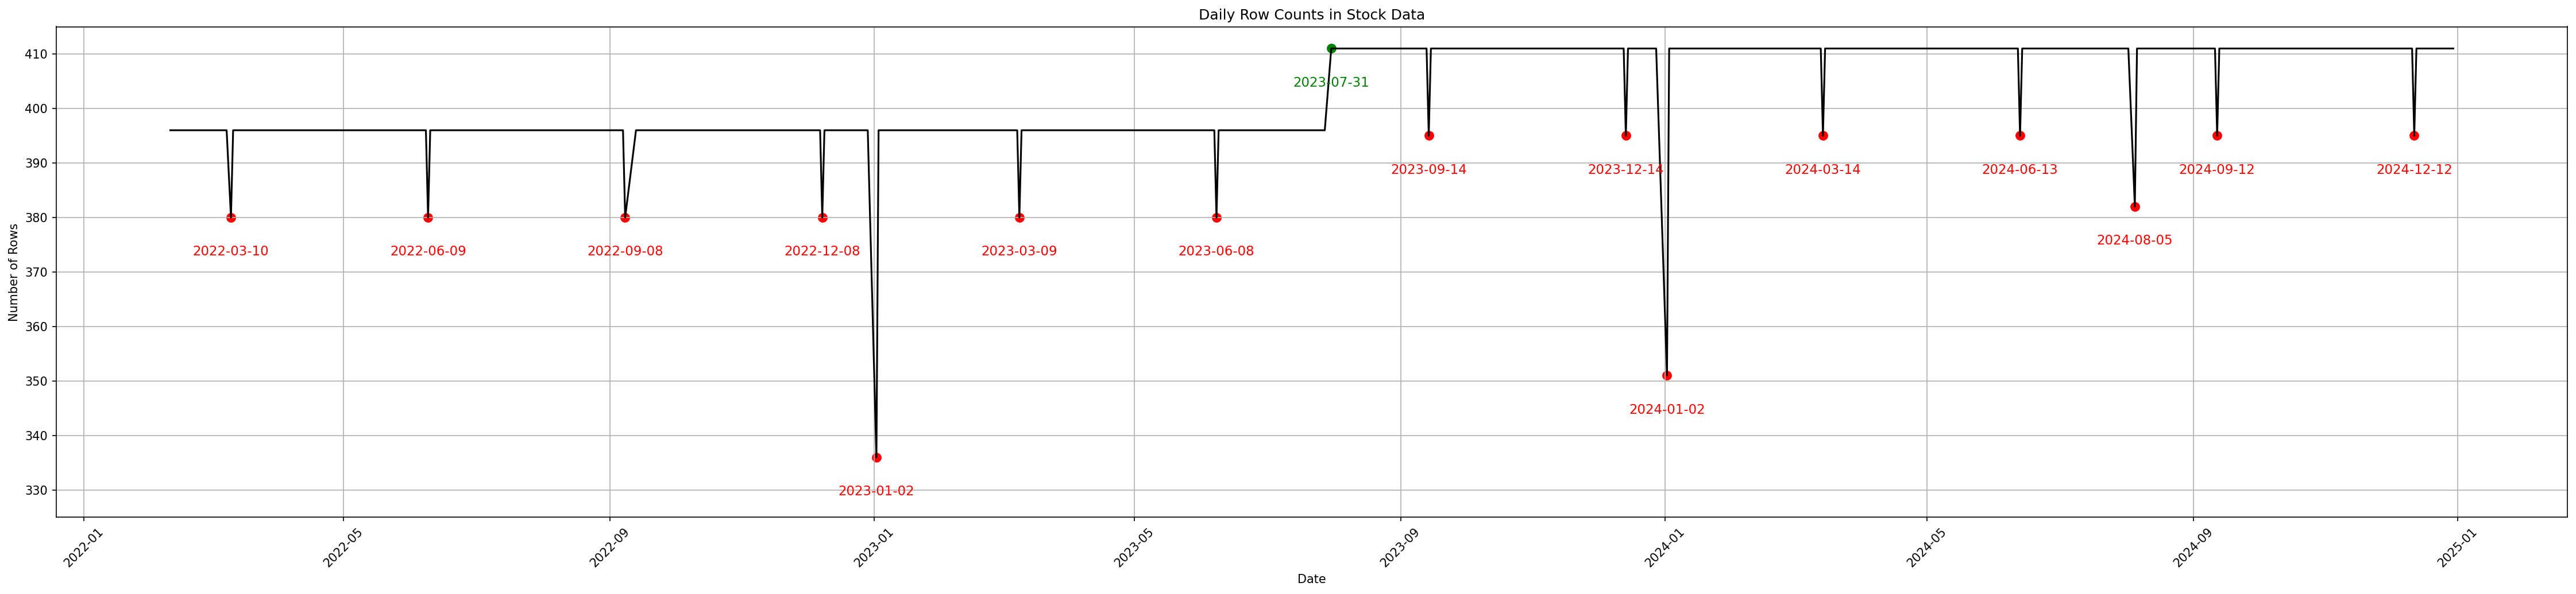

In [5]:
# daily_counts 데이터 시각화
plt.figure(figsize=(30, 7))
plt.plot(daily_counts.index, daily_counts.values, linestyle='-', color = 'black')

# 특정 행의 개수가 나타난 날짜를 강조
highlight_counts = [380, 336, 395, 351, 382]
for count in highlight_counts:
    highlight_dates = daily_counts[daily_counts == count].index
    for date in highlight_dates:
        plt.scatter(date, count, color='red', s=50)  # 각 날짜에 빨간색 점으로 표시
        plt.text(date, count - 7, f'{date.strftime("%Y-%m-%d")}', color='red', ha='center', fontsize=11)

# 396개에서 411개로 변경된 첫 날짜 찾기
first_change_date = daily_counts[(daily_counts.shift(1) == 396) & (daily_counts == 411)].index[0]
plt.scatter(first_change_date, 411, color='green', s=50)  # 변경점을 초록색 점으로 표시
plt.text(first_change_date, 411 - 7, f'{first_change_date.strftime("%Y-%m-%d")}', color='green', ha='center', fontsize=11)

# 그래프 설정
plt.xlabel('Date')
plt.ylabel('Number of Rows')
plt.title('Daily Row Counts in Stock Data')
plt.grid(True)
plt.xticks(rotation=45)  # 날짜 레이블을 45도 회전
plt.ylim(325, 415)  # Y축의 범위 설정
plt.tight_layout()  # 레이아웃 조정

plt.show()